In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
"""
SELECT TOP 1500 de,plx,ra,vmag,(vmag+5*(LOG10(ABS(plx*1000.)+0.0000001)+1)) as absmag FROM public.hipparcos  WHERE CONTAINS(POINT('ICRS',public.hipparcos.ra,public.hipparcos.de),BOX('ICRS',82.5,0,80,80))=1    AND  (vmag<7) ORDER BY absmag ASC  


SELECT TOP 500 de,plx,ra,vmag FROM public.hipparcos  WHERE CONTAINS(POINT('ICRS',public.hipparcos.ra,public.hipparcos.de),BOX('ICRS',82.5,0,15,24))=1    AND  (vmag<7)
SELECT TOP 20 de,plx,ra,vmag FROM public.hipparcos  WHERE CONTAINS(POINT('ICRS',public.hipparcos.ra,public.hipparcos.de),BOX('ICRS',82.5,0,15,20))=1    AND  (vmag<7) ORDER BY vmag ASC
"""
"de,plx,ra,vmag"
const = np.loadtxt("result.csv",delimiter=",",skiprows=1,converters = {3: lambda s: float(s.strip() or 0)})
const_main = np.loadtxt("result_main.csv",delimiter=",",skiprows=1,converters = {3: lambda s: float(s.strip() or 0)})[0:12]

In [3]:
ra0, dec0 = 84/180.*np.pi,0
ra, dec, plx = const[:,2]/180.*np.pi, const[:,0]/180.*np.pi, const[:,1]
dst = 1000./(plx)
flx = 0.5*np.exp((13.-const[:,3])/2.51)
lum = 0.5*np.exp((13.-const[:,4])/2.51)
x = np.cos(dec-dec0)*np.cos(ra-ra0)*dst
y = np.cos(dec-dec0)*np.sin(ra-ra0)*dst
z = np.sin(dec-dec0)*dst

ra_m, dec_m, plx_m = const_main[:,2]/180.*np.pi, const_main[:,0]/180.*np.pi, const_main[:,1]
dst_m = 1000./(plx_m)
flx_m = 0.5*np.exp((13.-const_main[:,3])/2.51)
x_m = np.cos(dec_m-dec0)*np.cos(ra_m-ra0)*dst_m
y_m = np.cos(dec_m-dec0)*np.sin(ra_m-ra0)*dst_m
z_m = np.sin(dec_m-dec0)*dst_m

/Users/rein/git/rebound/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


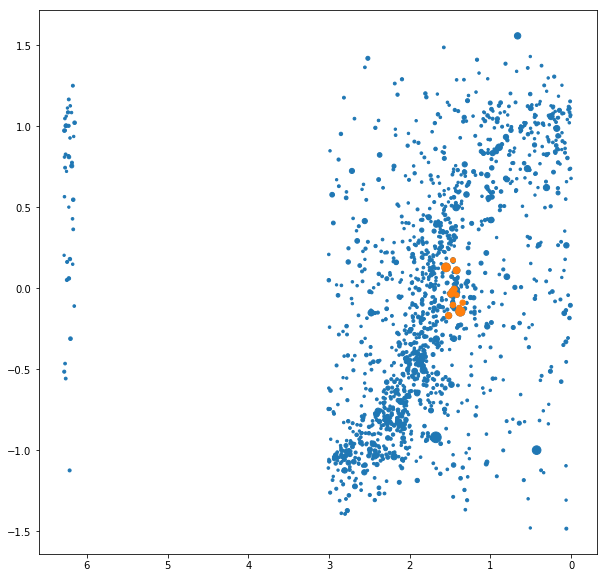

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.invert_xaxis()
ax.scatter(ra,dec,s=flx)
ax.scatter(ra_m,dec_m,s=flx_m)

In [72]:
stretch_due_to_incline = 1./np.cos(np.arctan(4./14.))

x_max = np.max(x_m)*1.1
y_max = stretch_due_to_incline*np.max(y_m)*1.1
z_max = np.max(z_m)*1.1
x_min = 0.
y_min = stretch_due_to_incline*np.min(y_m)*1.1
z_min = np.min(z_m)*1.1



box_size = np.array([136,14,41]) # width, depth, height
model_size = np.array([x_max-x_min, y_max-y_min, z_max-z_min])

In [73]:
ratio = np.max(model_size/box_size)
model_size/ratio

array([136.        ,  11.38421614,  32.29039252])

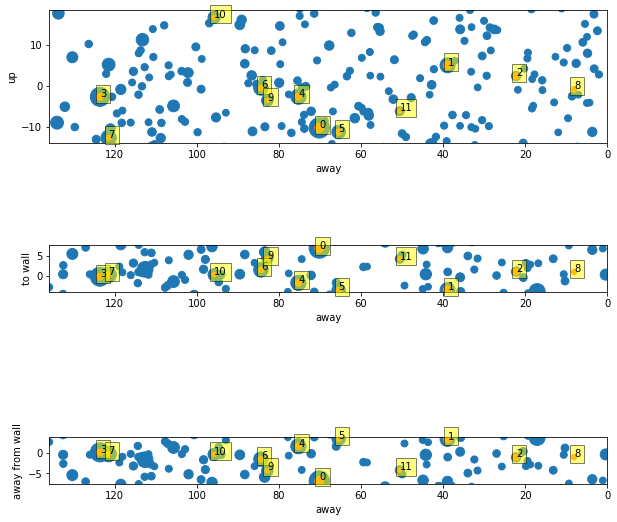

In [81]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311)
ax.set_xlim([x_max/ratio,x_min/ratio])
ax.set_ylim([z_min/ratio,z_max/ratio])
ax.set_ylabel("up")
ax.set_xlabel("away")
ax.set_aspect("equal")
ax.scatter(x/ratio,z/ratio,s=50000*lum)
ax.scatter(x_m/ratio,z_m/ratio,s=flx_m);
    
for i in range(len(y_m)):
    ax.annotate("%d"%i,xy=(x_m[i]/ratio, z_m[i]/ratio),
        bbox=dict(fc='yellow', alpha=0.5),
        )
    
    
ax = fig.add_subplot(312)
ax.set_xlim([x_max/ratio,x_min/ratio])
ax.set_ylim([-y_max/ratio,-y_min/ratio])
ax.set_ylabel("to wall")
ax.set_aspect("equal")
ax.set_xlabel("away")
ax.scatter(x/ratio,-stretch_due_to_incline*y/ratio,s=50000*lum);
ax.scatter(x_m/ratio,-stretch_due_to_incline*y_m/ratio,s=flx_m);

for i in range(len(y_m)):
    ax.annotate("%d"%i,xy=(x_m[i]/ratio, -y_m[i]/ratio),
        bbox=dict(fc='yellow', alpha=0.5),
        )

fig.savefig('orion_1.pdf', format='pdf', dpi=900)

  
ax = fig.add_subplot(313)
ax.set_xlim([x_max/ratio,x_min/ratio])
ax.set_ylim([y_min/ratio,y_max/ratio])
ax.set_ylabel("away from wall")
ax.set_aspect("equal")
ax.set_xlabel("away")
ax.scatter(x/ratio,stretch_due_to_incline*y/ratio,s=50000*lum);
ax.scatter(x_m/ratio,stretch_due_to_incline*y_m/ratio,s=flx_m);

for i in range(len(y_m)):
    ax.annotate("%d"%i,xy=(x_m[i]/ratio, y_m[i]/ratio),
        bbox=dict(fc='yellow', alpha=0.5),
        )

fig.savefig('orion_1.pdf', format='pdf', dpi=900)




/Users/rein/git/rebound/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


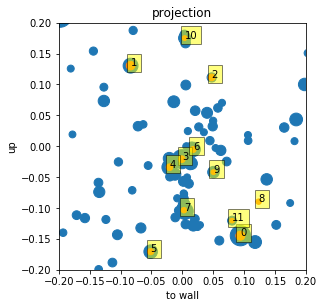

In [82]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(211)
ax.set_title("projection")
x_max = np.max(x_m)*1.1
y_max = np.max(y_m)*1.1
z_max = np.max(z_m)*1.1
y_min = np.min(y_m)*1.1
z_min = np.min(z_m)*1.1
ax.set_xlim([-0.2,0.2])
ax.set_ylim([-0.2,0.2])
ax.set_ylabel("up")
ax.set_xlabel("to wall")
ax.set_aspect("equal")
ax.scatter(-y/x,z/x,s=50000*lum)
ax.scatter(-y_m/x_m,z_m/x_m,s=flx_m);
for i in range(len(y_m)):
    ax.annotate("%d"%i,xy=(-y_m[i]/x_m[i], z_m[i]/x_m[i]), bbox=dict(fc='yellow', alpha=0.5),
        )
    

In [71]:
14 * stretch_due_to_incline

14.560219778561038

In [124]:
#heights from bottom
baseline = 5.
for i in range(len(z_m)):
    shift_due_to_inclinde = stretch_due_to_incline*(y_m[i]-y_min/1.1)/ratio/14.*1.
    print(i,"%.1f"%((z_m[i]-z_min/1.1)/ratio + shift_due_to_inclinde+ baseline))

0 7.4
1 23.4
2 20.5
3 15.5
4 15.6
5 7.2
6 17.5
7 5.5
8 17.3
9 14.3
10 34.8
11 11.7


In [178]:
#flux from earth (from left 2 right)
#flux from same distance (from left 2 right)
# 0 100000 - 145000
# 1 90000 - 150000
# 2 9000
# 3 500000
# 4 250000
# 5 56000
# 6 190000
# 7 200000
# 8 25             27
# 9 29000 (?)
# 10 165000
# 11 933 
#wikipedia_lum = [125000.,120000.,9000.,500000.,250000.,56000.,190000.,200000.,25.,29000.,165000.,933.]
sort = np.argsort(-x_m)
flux_on_earth = []
flux_from_fixed_distance = []
print("id  flux  lum_hip lum_wiki  ratio dist")
for j in range(len(z_m)):
    i = sort[j]
    lum_calc = 0.07*flx_m[i]*(dst_m[i]**2)
    flux_on_earth.append(flx_m[i])
    flux_from_fixed_distance.append(lum_calc)
    print("%2d %4.1f %9.1f %9.1f %5.2f %5.1f" %(i,flx_m[i],lum_calc,wikipedia_lum[i],lum_calc/wikipedia_lum[i],dst_m[i]))
flux_on_earth = np.array(flux_on_earth)
flux_from_fixed_distance = np.array(flux_from_fixed_distance)
flux_on_earth /= np.max(flux_on_earth)/(2**12-1)
flux_from_fixed_distance /= np.max(flux_from_fixed_distance)/(2**12-1)

id  flux  lum_hip lum_wiki  ratio dist
 3 45.3  536754.9  500000.0  1.07 411.5
 7 29.7  343329.5  200000.0  1.72 406.5
10 23.0  168627.3  165000.0  1.02 323.6
 6 36.2  200075.6  190000.0  1.05 280.9
 9 23.4  124838.6   29000.0  4.30 276.2
 4 44.4  195160.3  250000.0  0.78 250.6
 0 82.6  324812.3  125000.0  2.60 237.0
 5 38.9  133340.5   56000.0  2.38 221.2
11 21.2   43001.7     933.0 46.09 170.1
 1 74.2   89226.0  120000.0  0.74 131.1
 2 46.2   17952.9    9000.0  1.99  74.5
 8 29.3    1523.4      25.0 60.94  27.2


In [181]:
flux_on_earth.astype(int)

array([2243, 1470, 1139, 1795, 1158, 2199, 4095, 1928, 1052, 3677, 2288,
       1453])

In [182]:
flux_from_fixed_distance.astype(int)

array([4095, 2619, 1286, 1526,  952, 1488, 2478, 1017,  328,  680,  136,
         11])